In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import h2o.grid
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.11+9-LTS-194, mixed mode)
  Starting server from C:\Users\Gerd\venvs\kaggle\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gerd\AppData\Local\Temp\tmphm9xsrbe
  JVM stdout: C:\Users\Gerd\AppData\Local\Temp\tmphm9xsrbe\h2o_Gerd_started_from_python.out
  JVM stderr: C:\Users\Gerd\AppData\Local\Temp\tmphm9xsrbe\h2o_Gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_Gerd_wdlefo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.975 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [7]:
data = h2o.import_file('./data/prepped-train.csv')
prediction_frame = h2o.import_file('./data/test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
train, valid, test = data.split_frame([0.8, 0.1], seed=69)

In [9]:
train.summary()

,C1,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
type,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,233141.7642880874,100187.24200799472,0.3179459406735814,0.3351971374618398,0.5079988123288952,0.497363670010428,0.26115641006492823,0.4728885869038602,0.3031768071476366,0.2529677519395484,0.5622055251323662,0.4552741754803085,0.5409831113140389,0.3099684193628766,0.8431972159692981,0.35700055065353303,0.5219099352219557,0.2479886327103645,0.4783346314961371,0.14911362586473037,0.6269365868447213,1.2671947933108665,0.6388908927784888,0.33994787158455386,0.28937592637570125,0.22964150700023922,0.2603017444188046,0.6585797445630354,0.37858749259024627,0.29001384611426906,0.4715435757343469,0.4560056864183965,0.30336941067805145,0.6096037534917853,0.290060921517251,0.5855439653883351,0.2985415171853581,0.4088802546309386,0.24040814150425505,0.5383724323159632,0.3243014897058024,0.8261801579704852,0.37499567787315724,0.32123055341213924,0.2862338286089575,1.0667380963534372,0.36170733522046283,0.2679015543886028,0.41143598461659975,0.20043937289106323,0.4388902055464501,0.1575524010608659,0.7031202025863745,0.509949574668179,0.2699126100270767,0.504675526098932,1.2697525412127197,0.43910226955277454,0.6917044970493684,0.24761600970407913,0.36477601132938176,0.3767406989488625,0.43851460476725057,0.3720926906501156,0.6099320127543444,0.29770512138706573,0.26675236976310873,0.47715667344722956,0.18277391290951764,0.39045365129718934,0.3063802853066901,0.5555765229799694,0.3677424114943198,0.34194132629432256,0.40777710544531476,0.46351916398768844,0.17718275378246648,
maxs,466298.0,199999.0,4.127134385045092,3.951243718581427,4.174387269895637,4.2626798770413155,3.6635616461296463,4.343805421853684,3.784189633918261,3.4339872044851463,3.6635616461296463,4.290459441148391,3.5263605246161616,3.8501476017100584,3.6375861597263857,3.784189633918261,3.49650756146648,4.804021044733257,3.332204510175204,2.70805020110221,3.1354942159291497,5.575949103146316,3.4339872044851463,3.5263605246161616,4.820281565605037,3.1354942159291497,4.248495242049359,5.0106352940962555,3.218875824868201,4.442651256490317,4.663439094112067,4.442651256490317,3.1354942159291497,3.688879454113936,4.3694478524670215,3.737669618283368,3.610917912644224,3.737669618283368,3.7612001156935624,3.5553480614894135,3.737669618283368,3.912023005428146,4.406719247264253,4.30406509320417,3.9889840465642745,4.1588830833596715,3.332204510175204,3.4339872044851463,4.770684624465665,4.584967478670572,3.713572066704308,3.6635616461296463,4.04305126783455,4.3040650932041

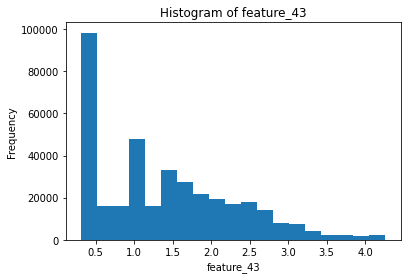

In [10]:
train["feature_43"].hist()

In [11]:
features = train.columns
features.remove("id")
features.remove("C1")
features.remove("target")

target = "target"

In [12]:
features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [17]:
#
# APPROACH 1: grid search deep learning model
#

In [14]:
grid = h2o.grid.H2OGridSearch(H2ODeepLearningEstimator(epochs=30, hidden = [400, 400], activation = "RectifierWithDropout", distribution="multinomial"),
                                search_criteria={"strategy":"RandomDiscrete", "max_models":5},
                                hyper_params={"seed":77, "l1":[0, 1e-6, 3e-6, 1e-5], "l2":[0, 1e-6, 3e-6, 1e-5],
                                             "input_dropout_ratio":[0, 0.1, 0.2, 0.3], #drops random n percent of input neurons
                                             "hidden_dropout_ratios":[[0,0], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6]] #drops random n percent of hidden neurons
                                             },
                                grid_id="deeplearning-grid"
               )

grid.train(x = features, y = target, training_frame = train, validation_frame = valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [16]:
grid.logloss()

{'deeplearning-grid_model_2': 1.7567585601688132,
 'deeplearning-grid_model_5': 1.7605834360339094,
 'deeplearning-grid_model_4': 1.7580911541966284,
 'deeplearning-grid_model_3': 1.7527778322642873,
 'deeplearning-grid_model_1': 1.7534067499854133}

In [ ]:
#
# APPROACH 2: grid search generalized linear model
#

In [9]:
grid2 = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(
    family = "multinomial",
    lambda_search = True,
    balance_classes = True,
    ),
    hyper_params = {
        "alpha":[x * 0.01 for x in range (0, 100)],
    },
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":8,
        "max_runtime_secs":60
    },
    grid_id="glm-grid",
)
grid2.train(x = features, y = target, training_frame = train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
#
# APPROACH 3: gbm model
#

In [21]:
gbm = H2OGradientBoostingEstimator(model_id = 'gbm-model', stopping_metric='logloss', balance_classes= True, score_tree_interval=1,
                                                  stopping_tolerance=0.01 ,stopping_rounds=5, ntrees=500, nfolds=6, max_depth=5)

gbm.train(x = features, y = target, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [16]:
#
# load existing gbm:
#

#gbm = h2o.load_model('./models/gbm-model')

In [22]:
gbm.model_performance(test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.6714515541986495
RMSE: 0.8194214753096538
LogLoss: 1.8186283890033674
Mean Per-Class Error: 0.6873883579806483
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Error,Rate
0,612.0,612.0,543.0,754.0,1161.0,232.0,714.0,444.0,26.0,0.879953,4Â 486 / 5Â 098
1,190.0,2249.0,678.0,446.0,391.0,460.0,114.0,651.0,23.0,0.567666,2Â 953 / 5Â 202
2,270.0,1458.0,1020.0,659.0,787.0,321.0,254.0,511.0,21.0,0.807583,4Â 281 / 5Â 301
3,419.0,532.0,670.0,1390.0,1195.0,113.0,579.0,234.0,27.0,0.730568,3Â 769 / 5Â 159
4,381.0,361.0,513.0,759.0,2254.0,76.0,629.0,165.0,26.0,0.563517,2Â 910 / 5Â 164
5,0.0,569.0,4.0,0.0,0.0,2612.0,0.0,2119.0,10.0,0.508468,2Â 702 / 5Â 314
6,396.0,294.0,263.0,587.0,1188.0,392.0,1179.0,888.0,20.0,0.773574,4Â 028 / 5Â 207
7,2.0,494.0,4.0,0.0,3.0,1373.0,6.0,3313.0,8.0,0.363252,1Â 890 / 5Â 203
8,293.0,927.0,419.0,548.0,739.0,650.0,386.0,1190.0,42.0,0.991914,5Â 152 / 5Â 194
9,2563.0,7496.0,4114.0,5143.0,7718.0,6229.0,3861.0,9515.0,203.0,0.686798,32Â 171 / 46Â 842



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.313202
1,2,0.523355
2,3,0.664596
3,4,0.781030
4,5,0.869391
5,6,0.937214
6,7,0.978097
7,8,0.991973
8,9,1.000000


In [23]:
gbm.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
Class_2,0.0739009,0.230438,0.120154,0.0469005,0.0375397,0.0745738,0.0556107,0.204824,0.156059
Class_6,0.0571135,0.118565,0.06961,0.0329146,0.0331897,0.411697,0.0479048,0.114345,0.11466
Class_8,0.0451047,0.0479703,0.0555795,0.0439765,0.0372109,0.134936,0.115779,0.392005,0.127438
Class_8,0.066949,0.122585,0.12201,0.0526411,0.0424436,0.134735,0.0806582,0.23567,0.142308
Class_8,0.0530245,0.0611007,0.0782198,0.0429079,0.0441501,0.24161,0.0771018,0.293967,0.107918
Class_8,0.0742226,0.0494754,0.0487793,0.0487823,0.0337516,0.27897,0.0811589,0.286386,0.0984736
Class_8,0.067088,0.0499753,0.05121,0.0612709,0.0327004,0.169285,0.128289,0.329016,0.111166
Class_2,0.0618039,0.242114,0.175548,0.0497426,0.0318353,0.161708,0.0452527,0.104143,0.127852
Class_8,0.0690351,0.0442162,0.0558657,0.062445,0.0366382,0.137708,0.0940328,0.386954,0.113105
Class_8,0.0576316,0.102285,0.0681821,0.0332859,0.0287827,0.258819,0.0712905,0.268718,0.111005


In [24]:
output = gbm.predict(prediction_frame)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
'''
FINDINGS:
    Deep Learning:
    - feature 20 seems to be very important
    
    GLM:
    - feature 12 and 43 seem to be very important
    
'''

In [15]:
#saving model
gbm_save = h2o.get_model(gbm.model_id)
h2o.save_model(gbm_save, './models/gbm-0.1')


'C:\\Users\\Gerd\\Desktop\\dev\\kaggle\\tbs-jun\\models\\gbm-0.1\\gbm-model'

In [25]:
output = output.as_data_frame()
ids = prediction_frame.as_data_frame()["id"]
result = pd.concat([ids, output], axis=1)
result = result.drop(["predict"], axis=1)
result.to_csv('./data/prediction-output.csv', index=False)

In [3]:
h2o.cluster().shutdown()

H2O session _sid_84a6 closed.
